In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV





TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [30]:
df=pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [21]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<AxesSubplot:title={'center':'Diabetes_012'}>,
        <AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'GenHlth'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <A

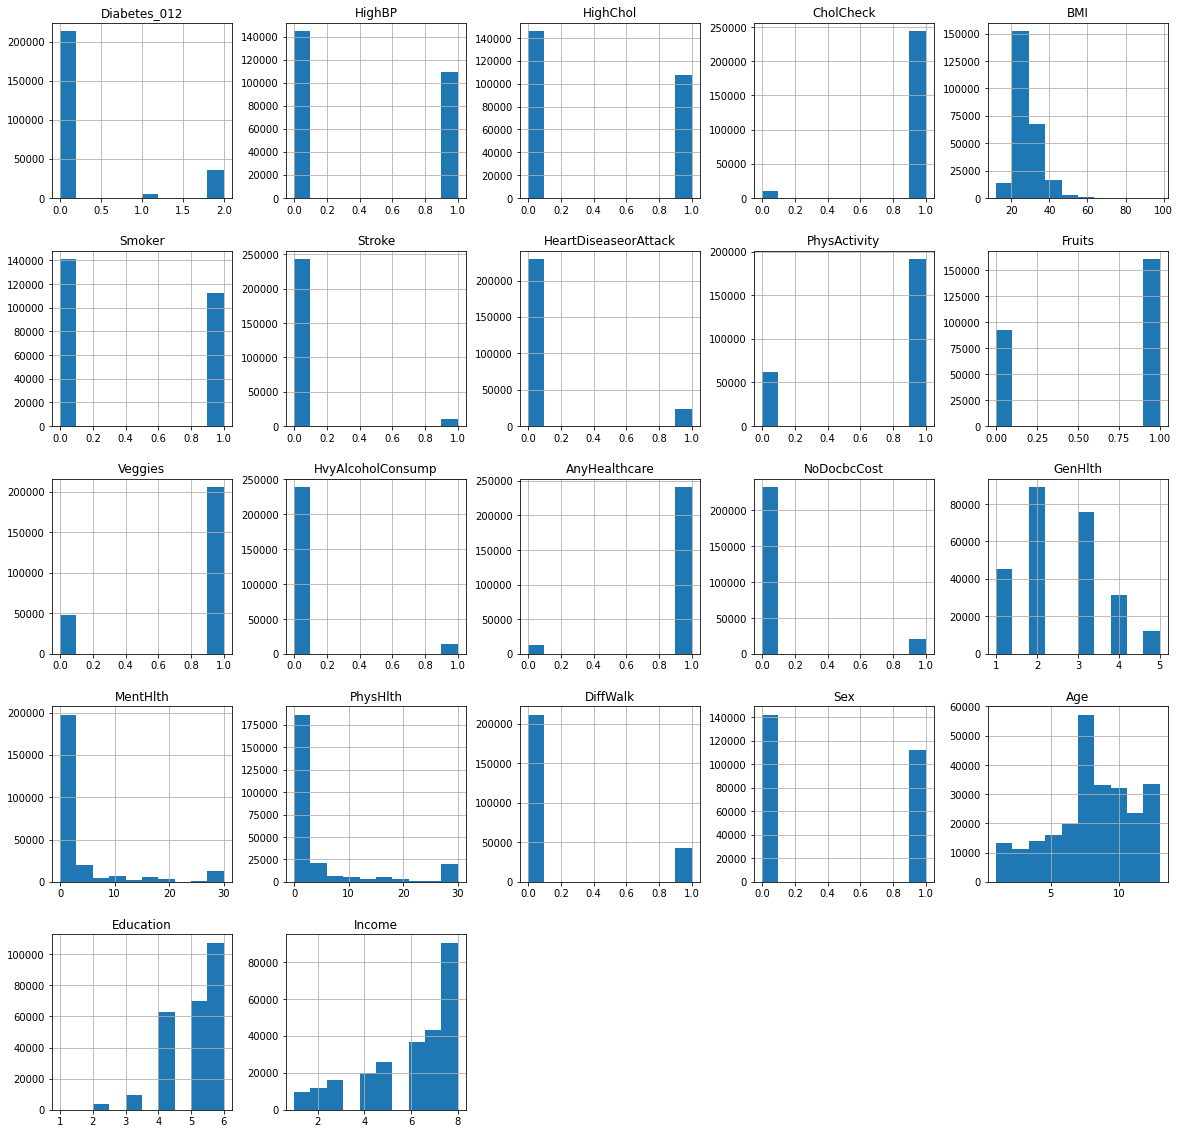

In [5]:
df.hist(figsize = (20,20))

In [6]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [31]:
df=df.drop(['CholCheck','Education','NoDocbcCost','AnyHealthcare','HvyAlcoholConsump','HeartDiseaseorAttack','PhysHlth','MentHlth'],axis=1)

In [32]:
df=df.drop(['Smoker','Stroke','Income'],axis=1)
df

,Diabetes_012,HighBP,HighChol,BMI,PhysActivity,Fruits,Veggies,GenHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,40.0,0.0,0.0,1.0,5.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,3.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0
3,0.0,1.0,0.0,27.0,1.0,1.0,1.0,2.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,1.0,1.0,1.0,2.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,1.0,1.0,3.0,0.0,1.0,5.0
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,4.0,1.0,0.0,11.0
253677,0.0,0.0,0.0,28.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,1.0,1.0,3.0,0.0,1.0,7.0


In [33]:
temp =[]
for x in range(len(df['Fruits'])):
    if df['Fruits'][x]==1 or  df['Veggies'][x]==1:
        temp.append(1)
    else:
        temp.append(0)
df['healthy_food']=temp
df

,Diabetes_012,HighBP,HighChol,BMI,PhysActivity,Fruits,Veggies,GenHlth,DiffWalk,Sex,Age,healthy_food
0,0.0,1.0,1.0,40.0,0.0,0.0,1.0,5.0,1.0,0.0,9.0,1
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,3.0,0.0,0.0,7.0,0
2,0.0,1.0,1.0,28.0,0.0,1.0,0.0,5.0,1.0,0.0,9.0,1
3,0.0,1.0,0.0,27.0,1.0,1.0,1.0,2.0,0.0,0.0,11.0,1
4,0.0,1.0,1.0,24.0,1.0,1.0,1.0,2.0,0.0,0.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,1.0,1.0,3.0,0.0,1.0,5.0,1
253676,2.0,1.0,1.0,18.0,0.0,0.0,0.0,4.0,1.0,0.0,11.0,0
253677,0.0,0.0,0.0,28.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1
253678,0.0,1.0,0.0,23.0,0.0,1.0,1.0,3.0,0.0,1.0,7.0,1


<AxesSubplot:>

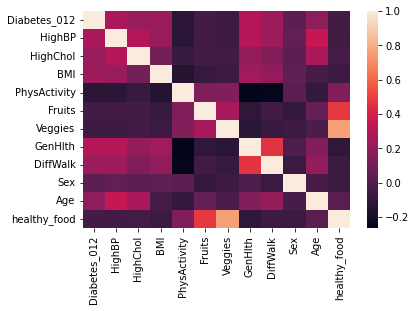

In [34]:
df1 =df.corr()
sns.heatmap(df1)

In [7]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [35]:
df=df.drop(['Fruits','Veggies'],axis=1)

In [13]:
for x in df :
    print(f'unique values of column {x}are \n {df[x].unique()}')

unique values of column Diabetes_012are 
 [0. 2. 1.]
unique values of column HighBPare 
 [1. 0.]
unique values of column HighCholare 
 [1. 0.]
unique values of column BMIare 
 [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
unique values of column PhysActivityare 
 [0. 1.]
unique values of column GenHlthare 
 [5. 3. 2. 4. 1.]
unique values of column DiffWalkare 
 [1. 0.]
unique values of column Sexare 
 [0. 1.]
unique values of column Ageare 
 [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
unique values of column healthy_foodare 
 [1 0]


In [40]:
df

,Diabetes_012,HighBP,HighChol,BMI,PhysActivity,GenHlth,DiffWalk,Sex,Age,healthy_food
0,0.0,1.0,1.0,40.0,0.0,5.0,1.0,0.0,9.0,1
1,0.0,0.0,0.0,25.0,1.0,3.0,0.0,0.0,7.0,0
2,0.0,1.0,1.0,28.0,0.0,5.0,1.0,0.0,9.0,1
3,0.0,1.0,0.0,27.0,1.0,2.0,0.0,0.0,11.0,1
4,0.0,1.0,1.0,24.0,1.0,2.0,0.0,0.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,3.0,0.0,1.0,5.0,1
253676,2.0,1.0,1.0,18.0,0.0,4.0,1.0,0.0,11.0,0
253677,0.0,0.0,0.0,28.0,1.0,1.0,0.0,0.0,2.0,1
253678,0.0,1.0,0.0,23.0,0.0,3.0,0.0,1.0,7.0,1


In [42]:
x = df.drop('Diabetes_012',axis =1)
y=df['Diabetes_012']
x

,HighBP,HighChol,BMI,PhysActivity,GenHlth,DiffWalk,Sex,Age,healthy_food
0,1.0,1.0,40.0,0.0,5.0,1.0,0.0,9.0,1
1,0.0,0.0,25.0,1.0,3.0,0.0,0.0,7.0,0
2,1.0,1.0,28.0,0.0,5.0,1.0,0.0,9.0,1
3,1.0,0.0,27.0,1.0,2.0,0.0,0.0,11.0,1
4,1.0,1.0,24.0,1.0,2.0,0.0,0.0,11.0,1
...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,45.0,0.0,3.0,0.0,1.0,5.0,1
253676,1.0,1.0,18.0,0.0,4.0,1.0,0.0,11.0,0
253677,0.0,0.0,28.0,1.0,1.0,0.0,0.0,2.0,1
253678,1.0,0.0,23.0,0.0,3.0,0.0,1.0,7.0,1


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [15]:
model = LinearRegression()

# Define the number of folds for k-fold cross-validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(model, x, y, cv=k_folds, scoring='neg_mean_squared_error')

# Print the mean squared error scores for each fold
print('MSE Scores: ', -scores)

# Print the mean of the scores as the overall evaluation metric
print('Mean MSE Score: ', -scores.mean())

MSE Scores:  [0.40193005 0.40597098 0.40865501 0.40493109 0.40726574]
Mean MSE Score:  0.4057505724155668


In [38]:
rf_model = RandomForestClassifier(n_estimators=250, max_depth=8, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest model accuracy:", accuracy)

Random Forest model accuracy: 0.850067013560391


In [41]:
import pickle
model_filename = 'diabetes_012_health_indicators.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model,file)

In [39]:
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree model accuracy:", accuracy)

Decision Tree model accuracy: 0.8482142857142857


In [18]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost model with hyperparameters
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model on the training set
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = adaboost_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost model accuracy:", accuracy)

AdaBoost model accuracy: 0.8488450015767897


In [19]:
len(x.columns)

21

In [28]:
ann_model = Sequential()

# Add input layer and hidden layers
ann_model.add(Dense(units=64, activation='relu', input_shape=(len(x.columns),)))
ann_model.add(Dense(units=32, activation='relu'))

# Add output layer
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
ann_model.fit(X_train, y_train, epochs=40, batch_size=10000, validation_split=0.1)

# Evaluate the model on the testing set
loss, accuracy = ann_model.evaluate(X_test, y_test)
print("ANN model accuracy:", accuracy)

Epoch 1/40
14/14 [==============================] - 1s 25ms/step - loss: 0.9701 - accuracy: 0.5689 - val_loss: 0.5846 - val_accuracy: 0.7197
Epoch 2/40
14/14 [==============================] - 0s 14ms/step - loss: 0.5698 - accuracy: 0.7598 - val_loss: 0.5148 - val_accuracy: 0.6761
Epoch 3/40
14/14 [==============================] - 0s 10ms/step - loss: 0.5005 - accuracy: 0.7254 - val_loss: 0.4661 - val_accuracy: 0.7372
Epoch 4/40
14/14 [==============================] - 0s 9ms/step - loss: 0.4702 - accuracy: 0.7304 - val_loss: 0.4477 - val_accuracy: 0.7350
Epoch 5/40
14/14 [==============================] - 0s 9ms/step - loss: 0.4534 - accuracy: 0.7252 - val_loss: 0.4312 - val_accuracy: 0.7241
Epoch 6/40
14/14 [==============================] - 0s 9ms/step - loss: 0.4394 - accuracy: 0.7201 - val_loss: 0.4164 - val_accuracy: 0.7217
Epoch 7/40
14/14 [==============================] - 0s 12ms/step - loss: 0.4277 - accuracy: 0.7163 - val_loss: 0.4058 - val_accuracy: 0.7283
Epoch 8/40
14/14

In [36]:
# Create a sequential model
model = Sequential()

# Add a dense layer with 10 units and input shape of 784 (28x28)
model.add(Dense(units=10, input_shape=(len(x.columns),), activation='softmax'))
model.add(Dense(units=1,  activation='softmax'))


# Compile the model with SGD optimizer and categorical crossentropy loss
sgd = SGD(learning_rate=0.9, momentum=0.5, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with SGD optimizer and batch size of 32
model.fit(X_train, y_train, epochs=20, batch_size=10000, verbose=1)

Epoch 1/20
16/16 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 8/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 9/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0182
Epoch 10/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0000e+0

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

# Define the hyperparameter space
param_grid = {'n_neighbors': [x for x in range(2,10)]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 8}
Best accuracy score: 0.8400150063086922


In [23]:
from sklearn import svm

svm_classifier = svm.SVC(kernel='linear')

# Train the model using the training set
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = svm_classifier.score(X_test, y_test)

# Print the accuracy
print("SVM model accuracy:", accuracy)

SVM model accuracy: 0.8434839167455062


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize the Decision Tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(**best_params)

# Train the classifier on the training data using the best hyperparameters
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
